In [1]:
!pip install mlxtend

In [2]:
!pip install wordcloud

In [3]:
#Importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.metrics.pairwise import pairwise_distances
from matplotlib import pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import matplotlib as mpl
from wordcloud import WordCloud

In [4]:
#Loading the data
df=pd.read_csv('data_big_basket.csv')
df.head()

,Member,Order,SKU,Created On,Description
0,M09736,6468572,34993740,22-09-2014 22:45,Other Sauces
1,M09736,6468572,15669800,22-09-2014 22:45,Cashews
2,M09736,6468572,34989501,22-09-2014 22:45,Other Dals
3,M09736,6468572,7572303,22-09-2014 22:45,Namkeen
4,M09736,6468572,15669856,22-09-2014 22:45,Sugar


## Data Cleaning

In [5]:
#Getting information regarding types of columns in data and number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62141 entries, 0 to 62140
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Member       62141 non-null  object
 1   Order        62141 non-null  int64 
 2   SKU          62141 non-null  int64 
 3   Created On   62141 non-null  object
 4   Description  62141 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.4+ MB


In [6]:
#Number of observations and variables in the dataframe
df.shape

(62141, 5)

In [7]:
#Unique values of Created On variable 
df['Created On'].unique()

array(['22-09-2014 22:45', '28-09-2014 14:06', '14-09-2014 23:06', ...,
       '2013-02-11 9:23', '2013-10-11 10:17', '16-11-2013 00:43'],
      dtype=object)

In [8]:
#Unique values of Description variable
df['Description'].unique()

array(['Other Sauces', 'Cashews', 'Other Dals', 'Namkeen', 'Sugar',
       'Banana', 'Sugar Cubes', 'Other Sweets', 'Other Rice Products',
       'Utensil Scrub Pads', 'Toor Dal', 'Buns & Pavs', 'Cakes',
       'Boiled Rice', 'Urad Dal', 'Jaggery', 'Raisins', 'Chips',
       'Almonds', 'Root Vegetables', 'Other Vegetables', 'Moong Dal',
       'Healthy Snacks', 'Raw Peanuts', 'Mosquito Repellent',
       'Whole Spices', 'Soya Products', 'Beans', 'Health Drinks',
       'Liquid Soaps & Bars', 'Washing Bars', 'Ghee', 'Organic F&V',
       'Sunflower Oils', 'Shoe Polish', 'Cream Biscuits', 'Cookies',
       'Snacky Nuts', 'Avalakki / Poha', 'Besan', 'Raw Rice',
       'Powdered Spices', 'Eggs', 'Corn Snacks', 'Bread',
       'Instant Noodles', 'Sooji & Rava', 'Gourd & Cucumber',
       'Shaving Cream, Foam & Gels', 'Brinjals', 'Hair Oil',
       'Ground Coffee', 'Other Dry Fruits', 'Basmati Rice', 'Face Wash',
       'Yogurt & Lassi', 'Wafers', 'Instant Pastas', 'Cooking Paste',
       'O

In [9]:
#Cleaning the data such that only relevant values of Description variable are kept
df = df [~ df['Description'].isin(['CFLs,cfls,7832553,2,0\r\n7831582,Channa Dal,channa-dal,7832491,2,0\r\n7832360,Cheese,cheese,7832363,2,0\r\n7831689,Chewing Gum,chewing-gum,7831685,2,0\r\n7832047,ChildrenS Books'])]
df

,Member,Order,SKU,Created On,Description
0,M09736,6468572,34993740,22-09-2014 22:45,Other Sauces
1,M09736,6468572,15669800,22-09-2014 22:45,Cashews
2,M09736,6468572,34989501,22-09-2014 22:45,Other Dals
3,M09736,6468572,7572303,22-09-2014 22:45,Namkeen
4,M09736,6468572,15669856,22-09-2014 22:45,Sugar
...,...,...,...,...,...
62136,M64379,8381435,15670260,16-11-2013 00:43,Organic F&V
62137,M64379,8381435,15668597,16-11-2013 00:43,Exotic Vegetables
62138,M64379,8381435,7570555,16-11-2013 00:43,Shoe Polish
62139,M64379,8381435,7587490,16-11-2013 00:43,Organic Dals & Pulses


In [10]:
#Evaluating the data cleaning by looking at unique values in Description variable
df['Description'].unique()

array(['Other Sauces', 'Cashews', 'Other Dals', 'Namkeen', 'Sugar',
       'Banana', 'Sugar Cubes', 'Other Sweets', 'Other Rice Products',
       'Utensil Scrub Pads', 'Toor Dal', 'Buns & Pavs', 'Cakes',
       'Boiled Rice', 'Urad Dal', 'Jaggery', 'Raisins', 'Chips',
       'Almonds', 'Root Vegetables', 'Other Vegetables', 'Moong Dal',
       'Healthy Snacks', 'Raw Peanuts', 'Mosquito Repellent',
       'Whole Spices', 'Soya Products', 'Beans', 'Health Drinks',
       'Liquid Soaps & Bars', 'Washing Bars', 'Ghee', 'Organic F&V',
       'Sunflower Oils', 'Shoe Polish', 'Cream Biscuits', 'Cookies',
       'Snacky Nuts', 'Avalakki / Poha', 'Besan', 'Raw Rice',
       'Powdered Spices', 'Eggs', 'Corn Snacks', 'Bread',
       'Instant Noodles', 'Sooji & Rava', 'Gourd & Cucumber',
       'Shaving Cream, Foam & Gels', 'Brinjals', 'Hair Oil',
       'Ground Coffee', 'Other Dry Fruits', 'Basmati Rice', 'Face Wash',
       'Yogurt & Lassi', 'Wafers', 'Instant Pastas', 'Cooking Paste',
       'O

In [11]:
#Checking for number of null and non-null values in the dataframe
df.isnull().sum()

Member         0
Order          0
SKU            0
Created On     0
Description    0
dtype: int64

In [12]:
#Converting the Created On variable from object type to pandas.datetime format
df['Created On'] = pd.to_datetime(df['Created On'],format='mixed')
#Extract year values
df['Year'] = df['Created On'].dt.year
#Extract month values
df['Month'] = df['Created On'].dt.month
#Extract day values
df['Day'] = df['Created On'].dt.day
#Extract time values
df['Time'] = df['Created On'].dt.time
df.head()

,Member,Order,SKU,Created On,Description,Year,Month,Day,Time
0,M09736,6468572,34993740,2014-09-22 22:45:00,Other Sauces,2014,9,22,22:45:00
1,M09736,6468572,15669800,2014-09-22 22:45:00,Cashews,2014,9,22,22:45:00
2,M09736,6468572,34989501,2014-09-22 22:45:00,Other Dals,2014,9,22,22:45:00
3,M09736,6468572,7572303,2014-09-22 22:45:00,Namkeen,2014,9,22,22:45:00
4,M09736,6468572,15669856,2014-09-22 22:45:00,Sugar,2014,9,22,22:45:00


In [13]:
#Dropping Created On variable
df = df.drop(columns = ['Created On'], axis = 1)
df.head()

,Member,Order,SKU,Description,Year,Month,Day,Time
0,M09736,6468572,34993740,Other Sauces,2014,9,22,22:45:00
1,M09736,6468572,15669800,Cashews,2014,9,22,22:45:00
2,M09736,6468572,34989501,Other Dals,2014,9,22,22:45:00
3,M09736,6468572,7572303,Namkeen,2014,9,22,22:45:00
4,M09736,6468572,15669856,Sugar,2014,9,22,22:45:00


***
__Q1. Examine the data and uncover valuable insights using exploratory data analysis (EDA).__
***

In [14]:
#Get summary statistics for each of the data columns
df.describe()

,Order,SKU,Year,Month,Day
count,6.213600e+04,6.213600e+04,62136.000000,62136.000000,62136.000000
mean,7.642325e+06,1.774272e+07,2013.227324,6.426806,15.558227
std,5.131015e+05,1.442473e+07,0.708614,3.339156,8.876267
min,6.422558e+06,6.884195e+06,2011.000000,1.000000,1.000000
25%,7.457967e+06,1.566838e+07,2013.000000,4.000000,8.000000
50%,7.725501e+06,1.566852e+07,2013.000000,7.000000,15.000000
75%,8.006500e+06,1.566987e+07,2014.000000,9.000000,23.000000
max,8.388492e+06,9.331950e+07,2014.000000,12.000000,31.000000


In [15]:
#Counting the number of items in the basket
df_basket_sizes = pd.DataFrame(df.groupby(['Member','Order'])['Description'].count())
df_basket_sizes

Description
Member Order               
M04158 6755145            1
       6763407            2
       6785498            3
       6807524            2
       7348982            3
...                     ...
M99206 8172020           19
       8242420           14
       8295038            7
       8325475           11
       8365452            7

[8386 rows x 1 columns]

In [16]:
#Summary statistics for basket sizes for all customers, and orders
df_basket_sizes.describe()

,Description
count,8386.000000
mean,7.409492
std,4.960762
min,1.000000
25%,4.000000
50%,7.000000
75%,10.000000
max,42.000000


***
__From the above visualization it is observed that the average basket size for all customers and orders is about 7.41 items with a standard deviation of 4.96 indicating moderate variation in basket sizes for all customers. Overall the largest basket size at Big Basket has had about 42 items, while the smallest has had 1 item. Using this information the apriori, and cosine similarity algorithms can observe itemset combinations, and similarity measures between different orders which are essential for generating accurate association rules, and product recommendations.__
***

In [17]:
#Indicate which are the most and least selling items at Big Basket among all orders and customers
vals = df['Description'].value_counts(normalize = True)
dict_proportions_of_items = {}
indices = vals.index
lsted = vals.tolist()
for i in range(len(lsted)):
    dict_proportions_of_items[indices[i]] = lsted[i]
dict_proportions_of_items

{'Other Vegetables': 0.0741277198403502,
 'Beans': 0.07321037723702846,
 'Root Vegetables': 0.0692513196858504,
 'Other Dals': 0.05265868417664478,
 'Organic F&V': 0.05009978112527359,
 'Whole Spices': 0.048297283378395776,
 'Gourd & Cucumber': 0.04784665894167632,
 'Brinjals': 0.041344792069009914,
 'Namkeen': 0.03579245525943093,
 'Banana': 0.03521308098364877,
 'Exotic Vegetables': 0.02269215913480108,
 'Moong Dal': 0.022257628427964464,
 'Sugar': 0.021629972962533797,
 'Toor Dal': 0.02100231749710313,
 'Sooji & Rava': 0.020616067979915026,
 'Raw Rice': 0.016994978756276556,
 'Bread': 0.016801853997682505,
 'Urad Dal': 0.014790137762327796,
 'Organic Dals & Pulses': 0.011394360757049053,
 'Sunflower Oils': 0.010895455130681086,
 'Avalakki / Poha': 0.01073451783185271,
 'Other Rice Products': 0.01025170593536758,
 'Cream Biscuits': 0.009897643877945152,
 'Other Dry Fruits': 0.009591863010171238,
 'Boiled Rice': 0.009205613492983133,
 'Cashews': 0.008674520406849491,
 'Almonds': 0.008

In [18]:
#Finding the most selling item at Big Basket by Description of product
max_prop_key = max(dict_proportions_of_items,key = dict_proportions_of_items.get)
max_prop_val = dict_proportions_of_items[max_prop_key]
print(f'The most selling item at Big Basket is {max_prop_key} which has a proportion of {max_prop_val}')

The most selling item at Big Basket is Other Vegetables which has a proportion of 0.0741277198403502


In [19]:
#Finding the least selling item at Big Basket by Description of product
min_prop_key = min(dict_proportions_of_items,key = dict_proportions_of_items.get)
min_prop_val = dict_proportions_of_items[min_prop_key]
print(f'The least selling item at Big Basket is {min_prop_key} which has a proportion of {min_prop_val}')

The least selling item at Big Basket is Toilet Paper which has a proportion of 1.6093729882837647e-05


In [20]:
#Dataframe indicating product popularity at Big Basket
description_props = pd.DataFrame(df['Description'].value_counts(normalize = True)).reset_index()
description_props1 = description_props.sort_values(by = 'proportion', ascending = False).head(10)
description_props1

,Description,proportion
0,Other Vegetables,0.074128
1,Beans,0.073210
2,Root Vegetables,0.069251
3,Other Dals,0.052659
4,Organic F&V,0.050100
5,Whole Spices,0.048297
6,Gourd & Cucumber,0.047847
7,Brinjals,0.041345
8,Namkeen,0.035792
9,Banana,0.035213


/Users/sarthakyadav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarthakyadav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarthakyadav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


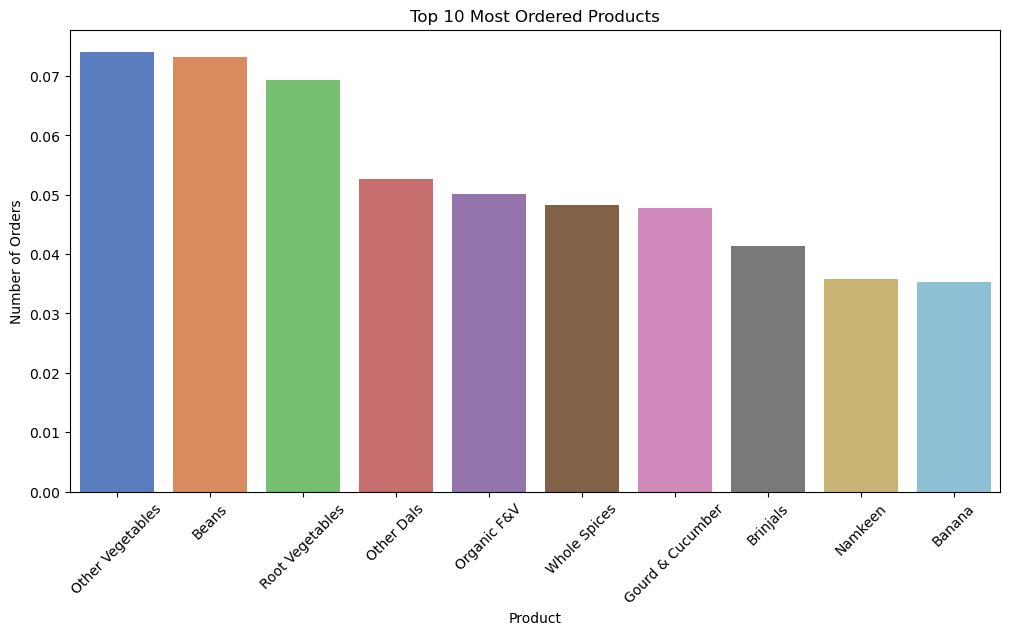

In [21]:
#Visualization denoting the top 10 products at Big Basket
plt.figure(figsize=(12, 6))
sns.barplot(x=description_props1.Description, y=description_props1.proportion, palette='muted')
plt.title('Top 10 Most Ordered Products')
plt.xlabel('Product')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

***
__From the bar chart above the most ordered items at Big Basket can be observed with the y axis indicating the proportion of times the item was ordered, and the x axis indicating the item name. Other Vegetables was the most frequently ordered item at Big Basket. Through this distribution the apriori algorithm can be informed about items which will have higher support potentially leading to stronger association rules. For cosine similarity more popular products can have a more significant impact on similarity scores between customers orders.__
***

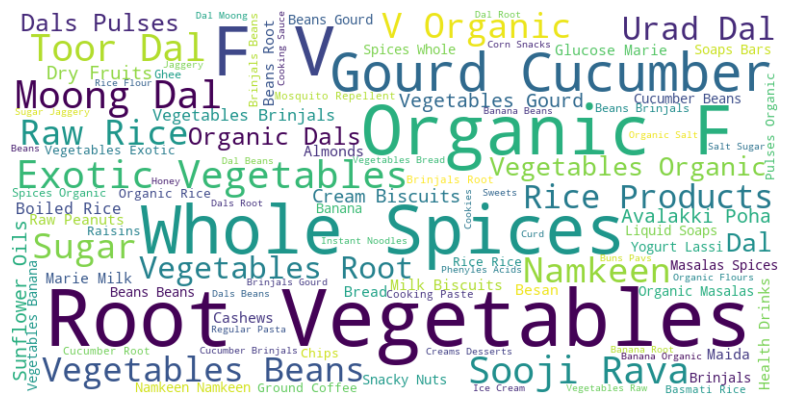

In [22]:
#Word Cloud to indicate the most popular products at Big Basket with larger sizes indicating more frequency
all_descriptions = ' '.join(df['Description'].dropna())
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue', width=800, height=400).generate(all_descriptions)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

***
__The above visualization indicates a word cloud which depicts the frequency of product orders with the size of each word indicating how often that product is ordered. The words 'Organic', 'Vegetables', 'Root', 'Gourd', etc., seem to occur often indicating these are the most popular product categories at Big Basket. Through this distribution the apriori algorithm can be informed about items which will have higher support potentially leading to stronger association rules. For cosine similarity more popular products can have a more significant impact on similarity scores between customers orders.__
***

In [23]:
#Dataframe indicating product popularity at Big Basket by product SKU
sku_props = pd.DataFrame(df['SKU'].value_counts(normalize = True)).reset_index()
sku_props1 = sku_props.sort_values(by = 'proportion', ascending = False).head(10)
sku_props1

,SKU,proportion
0,15668381,0.027392
1,15668688,0.024784
2,15668460,0.023159
3,15668379,0.022773
4,15668478,0.020149
5,15668468,0.018299
6,15668378,0.016142
7,15668467,0.015498
8,15668416,0.015064
9,15668465,0.014855


/Users/sarthakyadav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarthakyadav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarthakyadav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


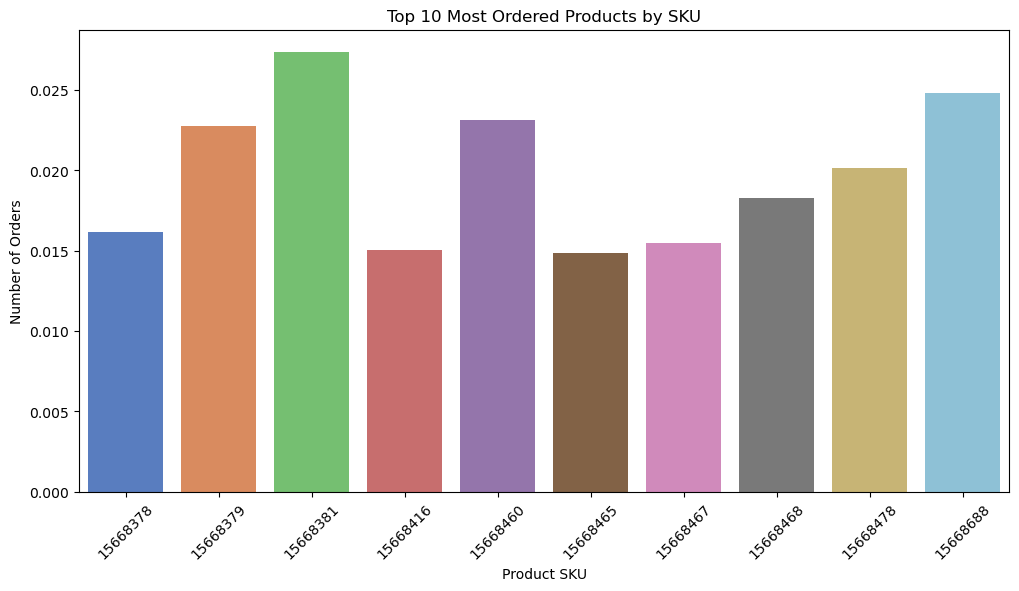

In [24]:
#Visualization denoting the top 10 products by SKU at Big Basket
plt.figure(figsize=(12, 6))
sns.barplot(x=sku_props1.SKU, y=sku_props1.proportion, palette='muted')
plt.title('Top 10 Most Ordered Products by SKU')
plt.xlabel('Product SKU')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

***
__The above visualization indicates the products which are most commonly purchased at Big Basket based on the SKU (Stock Keeping Unit) of the product with the y axis denoting the frequency of occurrence of the SKU among all orders at Big Basket, and the x axis indicating the SKU of the product. It is observed that the SKU value of 15668381 is the most popular. This visualization is particularly useful for inventory management, and sales strategy as it highlights the specific products ordered most frequently. This visualization is relevant for apriori algorithm as it can highlight the algorithm's support values. This visualization is relevant for cosine similarity algorithm as it indicates items commonly co-purchased, or overlooked at Big Basket.__
***

In [25]:
#Average basket size by customer at Big Basket
df_avg_basket_cust = pd.DataFrame(df_basket_sizes.reset_index().groupby('Member')['Description'].mean())
df_avg_basket_cust

,Description
Member,
M04158,3.727273
M08075,11.600000
M09303,4.409524
M09736,10.096774
M12050,14.256410
...,...
M90375,5.215190
M91098,7.318182
M96365,5.506849


,Description
Member,
M04158,3.727273
M08075,11.600000
M09303,4.409524
M09736,10.096774
M12050,14.256410
M12127,11.342105
M14746,9.112676
M16218,6.021739
M16611,6.774194


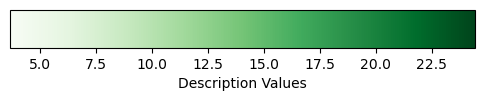

In [26]:
#Visualization encoding the average basket size by customer at Big Basket to indicate customers with largest basket sizes
styled_df = df_avg_basket_cust.style.background_gradient(cmap = 'Greens', subset = ['Description'])
display(styled_df)
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cmap = mpl.cm.Greens
norm = Normalize(vmin=df_avg_basket_cust['Description'].min(), vmax=df_avg_basket_cust['Description'].max())
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Description Values')
plt.show()

***
__From the visualization above the average basket size based on number of items purchased by each member customer is observed for Big Basket. The darker colours indicate a larger average basket size, while the lighter colours indicate a smaller average basket size. From this visualization information regarding high-value customer, profitability from each customer, etc., can be calculated, and loyalty programs can be appropriately devised as well by Big Basket. This visualization is relevant for apriori algorithm as it provides insights into the purchasing behaviour of individual members at Big Basket. In apriori algorithm this visualization can help set appropriate support thresholds for different segments of customers. This visualization is relevant for cosine similarity as it helps understand the purchase patterns, and this data can be used to provide more personalized recommendations as it reflects the typical scale of a customer's order at Big Basket.__
***

In [27]:
#Average basket size by customer at Big Basket
df_avg_basket_order = pd.DataFrame(df_basket_sizes.reset_index().groupby('Order')['Description'].mean())
df_avg_basket_order

,Description
Order,
6422558,9.0
6422636,11.0
6423338,12.0
6423534,4.0
6423959,4.0
...,...
8387964,3.0
8387967,6.0
8388196,7.0


,Description
Order,
6422558,9.000000
6422636,11.000000
6423338,12.000000
6423534,4.000000
6423959,4.000000
6424341,5.000000
6424438,1.000000
6424740,17.000000
6424814,3.000000


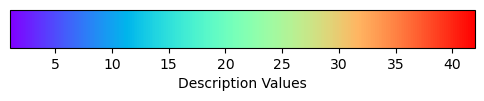

In [28]:
#Visualization encoding the average basket size by order at Big Basket to indicate the largest orders by basket sizes
styled_df = df_avg_basket_order.style.background_gradient(cmap = 'rainbow', subset = ['Description'])
display(styled_df)
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cmap = mpl.cm.rainbow
norm = Normalize(vmin=df_avg_basket_order['Description'].min(), vmax=df_avg_basket_order['Description'].max())
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Description Values')
plt.show()

***
__From the visualization above the average basket size for the various orders at Big Basket is observed with the colors closer to red indicating larger basket size, and the colors closer to purple indicating smaller basket size. Through this visualization the variance in the size of basket based on the number of items ordered can be observed. This visualization is relevant for Big Basket for segmentation of customers, performing marketing strategies to increase basket sizes, etc. This visualization is relevant for apriori algorithm as it helps identify itemset frequency, and relationships since larger baskets produce more item association rules. This visualization is relevant for cosine similarity algorithm as varying basket sizes can influence the similarity scores between different customers purchasing patterns helping generate personalized recommendations.__
***

In [29]:
#Creating date, day of week, and hour of day columns of pandas.datetime format
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
#Extracting the day of the week using the Date variable
df['DayOfWeek'] = df['Date'].dt.dayofweek
#Extracting the Hour of Day using the Time variable
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df.head()

,Member,Order,SKU,Description,Year,Month,Day,Time,Date,DayOfWeek,Hour
0,M09736,6468572,34993740,Other Sauces,2014,9,22,22:45:00,2014-09-22,0,22
1,M09736,6468572,15669800,Cashews,2014,9,22,22:45:00,2014-09-22,0,22
2,M09736,6468572,34989501,Other Dals,2014,9,22,22:45:00,2014-09-22,0,22
3,M09736,6468572,7572303,Namkeen,2014,9,22,22:45:00,2014-09-22,0,22
4,M09736,6468572,15669856,Sugar,2014,9,22,22:45:00,2014-09-22,0,22


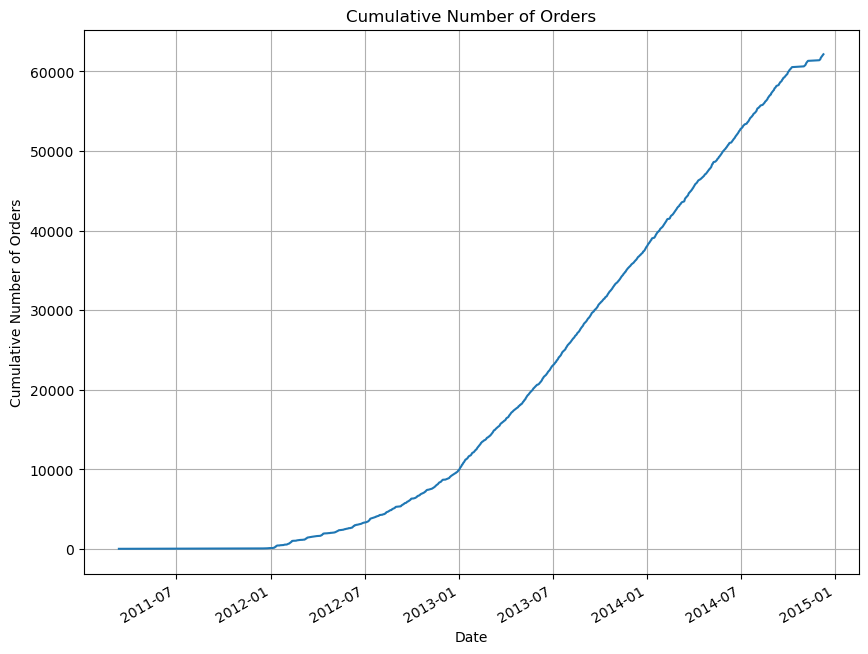

In [30]:
#Visualization depicting the cumulative number of orders at Big Basket over time
sorted_dates = df.sort_values('Date')
cumulative_order_num = sorted_dates.groupby('Date').size().cumsum()
plt.figure(figsize=(10,8))
cumulative_order_num.plot()
plt.title('Cumulative Number of Orders')
plt.xlabel('Date')
plt.ylabel('Cumulative Number of Orders')
plt.grid()
plt.show()

***
__From the visualization above the cumulative number of orders at Big Basket is observed over time from 2011 to 2015. It is observed that post January, 2012 Big Basket had a steep, and steady increase in the number of orders placed indicating rapid business expansion, and increased customer acquisition, or retention during this period. From January, 2015 though it seems as though this pace of expansion was slowing as cumulative number of orders at Big Basket seem to be plateauing.__
***

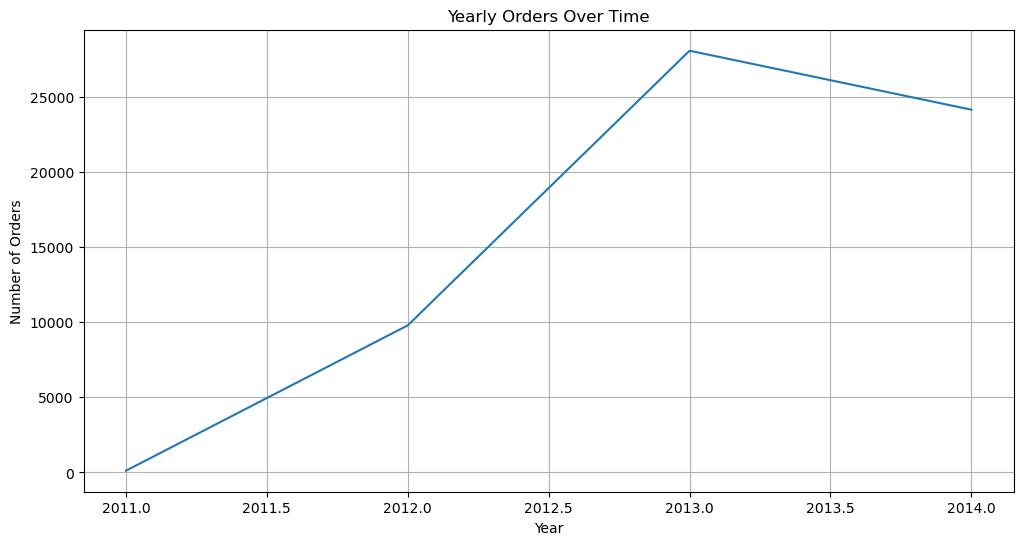

In [31]:
#Visualization depicting the number of orders per year at Big Basket
plt.figure(figsize=(12, 6))
df.groupby(df['Date'].dt.year).size().plot(kind='line')
plt.title('Yearly Orders Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

***
__From the visualization above the yearly order volume at Big Basket is observed. Based on the line graph the number of orders per year placed at Big Basket increased steadily from 2011 to 2013, but then from 2013 onwards declined slightly suggesting an overall growth trend, but recent decline in the number of orders per year using the platform which can create a sense of urgency at Big Basket to reverse this trend.__
***

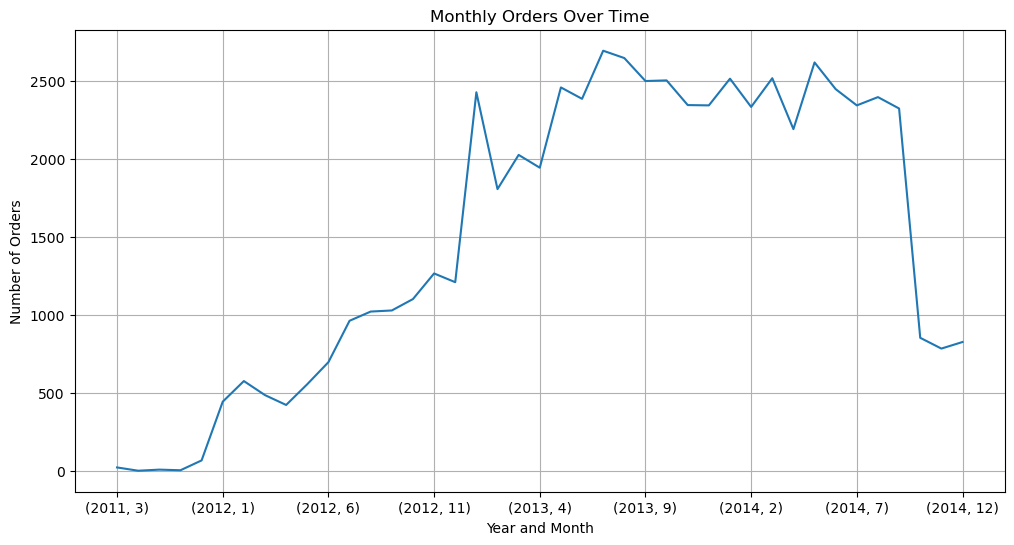

In [32]:
#Visualization depicting the number of orders per year and month at Big Basket
plt.figure(figsize=(12, 6))
df.groupby([df['Date'].dt.year, df['Date'].dt.month]).size().plot(kind='line')
plt.title('Monthly Orders Over Time')
plt.xlabel('Year and Month')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

***
__From the visualization above monthly trends over several years are observed. Based on the line chart from 2011 onwards there has been an overall increasing trend in the number of orders per month with seasonal fluctuations with peaks corresponding to winter months particularly. Moreover, there has been a recent trend of decline in the number of orders per month starting from around June of 2014 which could either be due to a data anomaly, seasonal dip, or a real decrease in the number of orders per month in which case further investigation would be required.__
***

/Users/sarthakyadav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarthakyadav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarthakyadav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


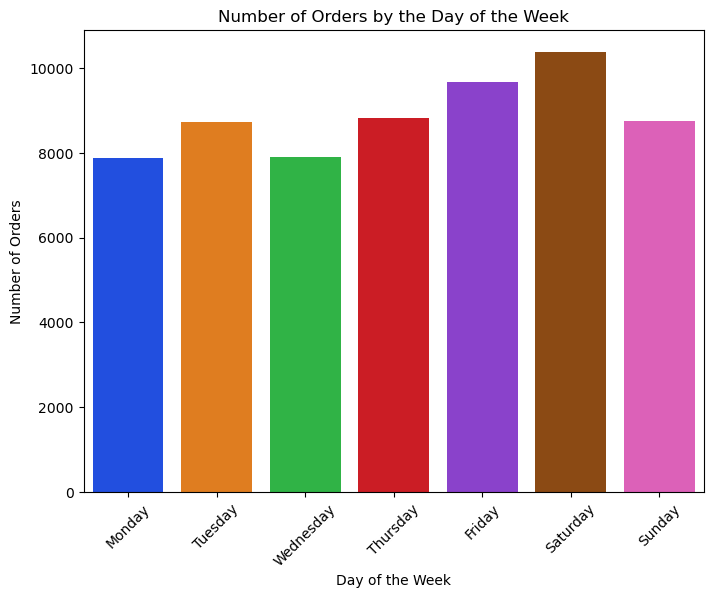

In [33]:
#Visualization depicting the number of orders by the day of the week
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='DayOfWeek', palette='bright')
plt.title('Number of Orders by the Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],rotation=45)
plt.show()

***
__From the visualization above the number of orders by day of week is observed. Saturday is observed to have the largest number of orders placed on Big Basket followed closely by Friday indicating that closer to the start of the weekend most orders of Big Basket are placed. Monday is observed to have the lowest number of orders suggesting a drop in activity at the start of the week. This visualization can be used for target marketing efforts.__
***

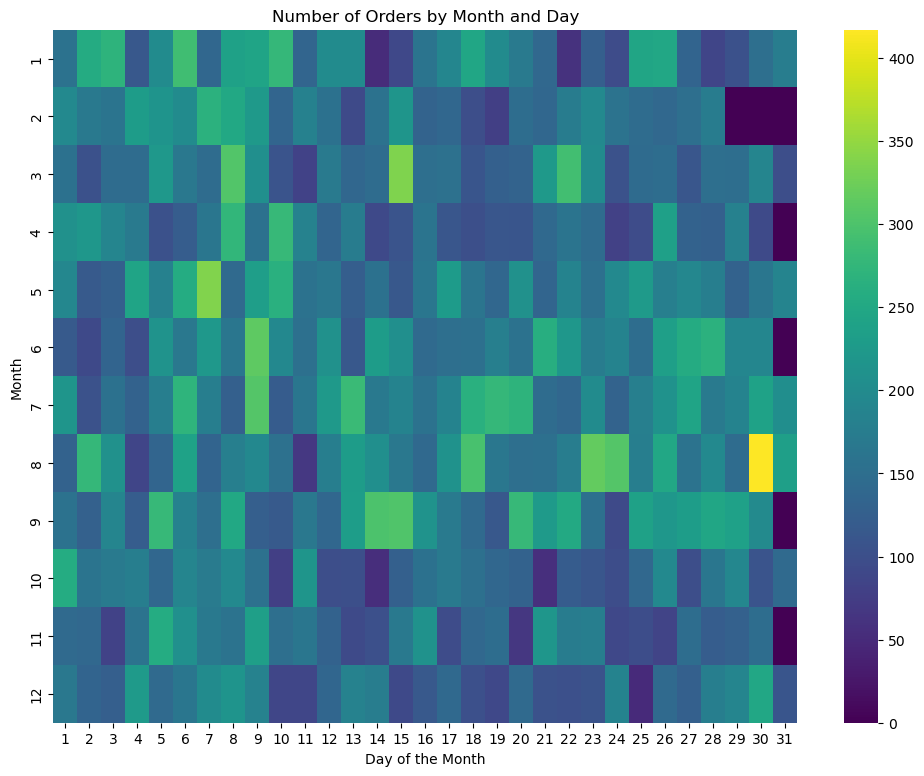

In [34]:
#Visualization depicting the number of orders by the month and day of the month
order_heatmap_data = df.groupby([df['Month'], df['Date'].dt.day]).size().unstack(fill_value = 0)
plt.figure(figsize=(12, 9))
sns.heatmap(order_heatmap_data, cmap='viridis')
plt.title('Number of Orders by Month and Day')
plt.xlabel('Day of the Month')
plt.ylabel('Month')
plt.show()

***
__From the visualization above the order count by each day of the month in a year is observed. Based on the heatmap the darker colours indicate fewer number of orders, while the lighter colours indicate more orders. Typically there seem to be more orders placed in the initial few months of the year, and fewer number of orders towards the end of the year. There are some days with unusually large number of orders which could be due to promotional events, festivals, paydays, etc.__
***

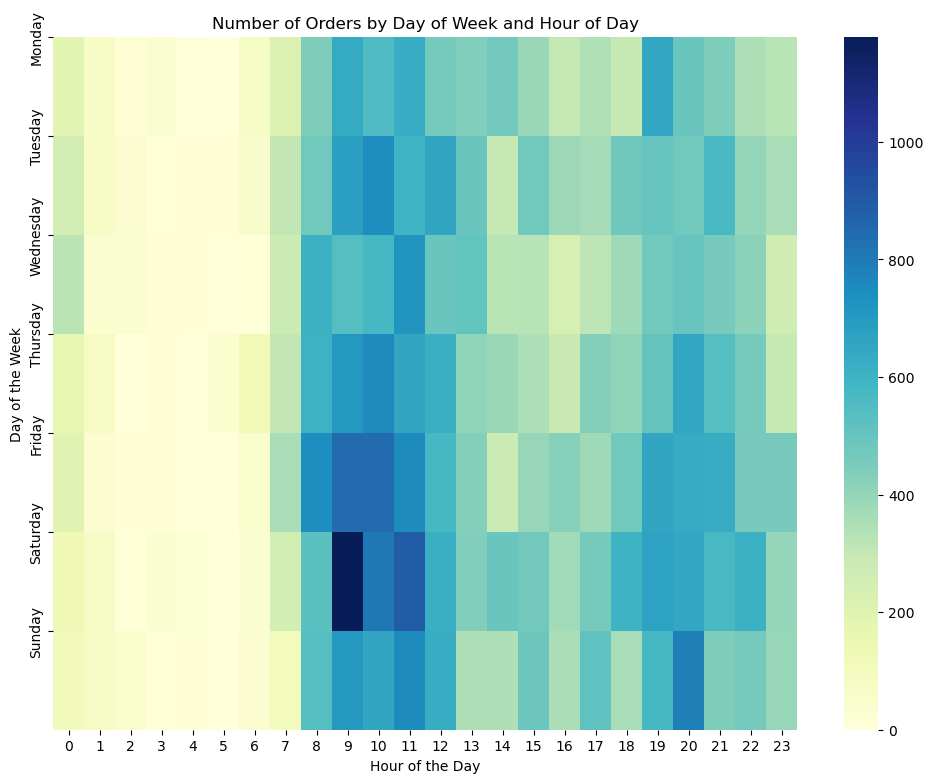

In [35]:
#Visualization depicting the number of orders by the day of the week and hour of day
order_heatmap_data = df.groupby([df['DayOfWeek'], df['Hour']]).size().unstack(fill_value = 0)
plt.figure(figsize=(12, 9))
sns.heatmap(order_heatmap_data, cmap='YlGnBu')
plt.title('Number of Orders by Day of Week and Hour of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.yticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

***
__From the visualization above the order count of each hour of day for the entire week can be observed. Based on the heatmap the darker colours indicate higher order count, while the lighter colours indicate lower order count. The heatmap indicates that Saturday is the busiest day for orders at Big Basket, and that typically more orders are done on Big Basket towards late morning, and afternoon hours instead of early morning, or late night. This visualization will be useful for resource allocation such as scheduling staff for order processing, and customer service during high volume periods.__
***

/Users/sarthakyadav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarthakyadav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


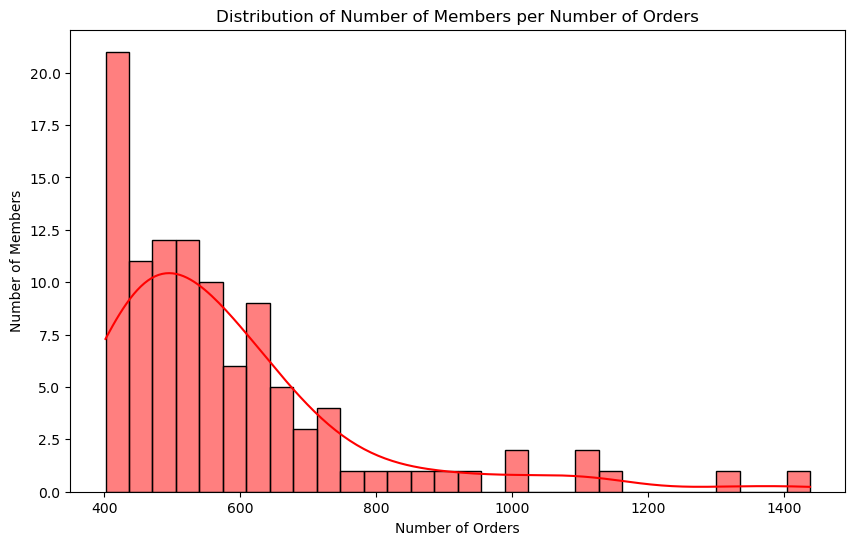

In [36]:
#Visualization depicting number of members ordering a certain amount through Big Basket
plt.figure(figsize=(10, 6))
sns.histplot(df.groupby('Member').size(), bins=30, kde=True, color='red')
plt.title('Distribution of Number of Members per Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Members')
plt.show()

***
__From the visualization above the frequency distribution of members based on the number of orders they made at Big Basket is observed. Most of the members placed fewer than 600 orders at Big Basket, and beyond 600 orders the frequency steadily declines as the number of orders goes on increasing resulting in a right skewed distribution suggesting that a small number of members are responsible for a majority of the orders at Big Basket, while majority of the members are responsible for less than 600 orders at Big Basket. This visualization can be used to identify high value customers, and develop loyalty programs. From this visualization it can be observed that majority of members place few orders at Big Basket influencing the apriori algorithm's support thresholds for itemsets, and affecting the density of the data used in cosine similarity calculations in turn impacting the robustness of the recommendation algorithms.__
***

/Users/sarthakyadav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarthakyadav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


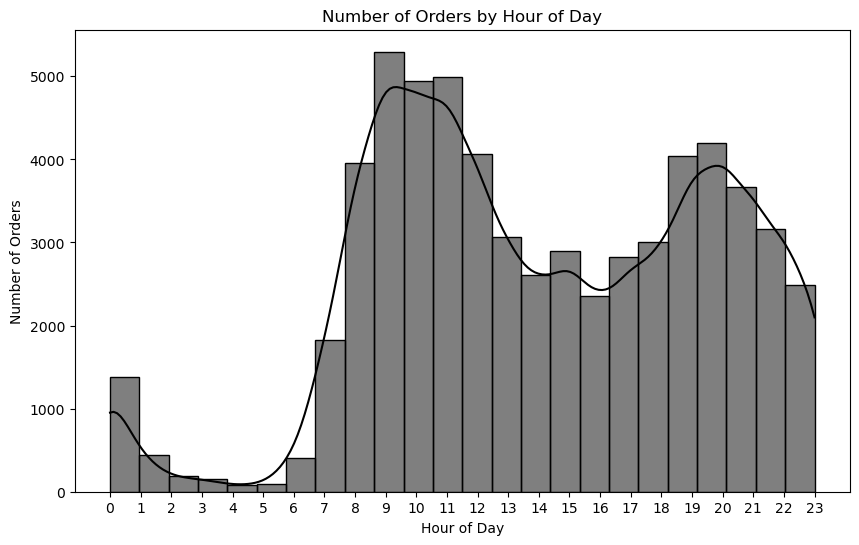

In [37]:
#Visualization depicting the number of orders made by the hour of the day
plt.figure(figsize=(10, 6))
sns.histplot(df['Hour'], bins=24, kde=True, color='black')
plt.title('Number of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(np.arange(0, 24, 1))
plt.show()

***
__From the visualization above the number of orders placed at Big Basket by the hour of day is observed. The frequency distribution for orders placed by the hour of day is a bimodal distribution indicating that most orders are placed late in the morning, or late in the evening around dinner time. This visualization is useful to identify peak times for targeted promotions, and staff scheduling. The time specific order patterns from this visualization can prioritize time based product associations in apriori algorithm, and refine time of day recommendations in cosine similarity algorithm.__
***

***
__Q2. Develop a generic code to create a smart basket for a given member ID by utilizing the Apriori algorithm. Your generic code should be structured as follows:__

__def apriori_recommender(df, member_id, min_support, top):__

    # Implement Apriori algorithm here

__This function takes a DataFrame `df`, the `member_id`, `min_support`, and `top` (number of items to recommend) as input parameters. Its purpose is to produce a tailored basket recommendation for the specified member.__

__As an example, print the recommended basket for member_id='M36432' with min_support=0.1 and top=3."__
***

In [38]:
def apriori_recommender(df, member_id, min_support, top):
    #Create a dataframe indicating basket of items based on Order and Member
    grouped_df = df.groupby(['Member','Order'])['Description'].agg(lambda descriptions: tuple(descriptions)).reset_index()
    #Filter the dataframe for the customer concerned
    df_subset=grouped_df[grouped_df['Member'] == member_id]
    #Create a list of lists where each inner list represents items in an order
    dataset = []
    for i in df_subset['Description']:
        val = list(i)
        dataset.append(val)
    #Initialize Transaction Encoder in order to convert dataframe into suitable format for apriori
    te = TransactionEncoder()
    te_ary = te.fit(dataset).transform(dataset)
    #Convert encoded array into a dataframe with item names as columns
    df1 = pd.DataFrame(te_ary, columns=te.columns_)
    #Apply apriori algorithm in order to evaluate frequent items to be ordered based on minimum support satisfied
    frequent_itemsets = apriori(df1, min_support=min_support, use_colnames=True)
    #Sort frequent items by support in descending order
    frequent_itemsets.sort_values(['support'],ascending=False)
    #Generate association rules from frequent itemsets using the lift metric with a minimum threshold
    wooden_star_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=.5)
    #Sort values by lift and support in descending order and subset columns necessary
    recommendations = wooden_star_rules.\
        sort_values(['lift','support'],ascending=False).\
        reset_index(drop=True).\
        loc[:,['antecedents','consequents','antecedent support','consequent support','confidence','lift']]
    #Subset the recommendations based on the top N number of recommendations requested
    selected_recs = recommendations.head(top)
    #Return top N recommendations based on the sorted values
    return selected_recs[['antecedents','consequents']]

In [39]:
#Sample Output
apriori_recommender(df, 'M36432', 0.1, 3)

,antecedents,consequents
0,(Gourd & Cucumber),(Brinjals)
1,(Brinjals),(Gourd & Cucumber)
2,(Other Vegetables),(Beans)


***
__3. Develop a generic code to recommend a set of n missing products in a shopping basket using the Cosine similarity measure. Your generic code should be structured as follows:__

__def cosine_missing(df, order_id, top):__

    # Implement Cosine similarity algorithm here

__This function takes a DataFrame `df`, the `order_id`,  and `top` (number of items to recommend) as input parameters.  Its purpose is to generate a 'Did you forget?' recommendation for the specified order. Print the missing 3 items for order_id = 6468572 as an example."__
***

In [42]:
def cosine_missing(df, order_id, top):
    #Create a dataframe indicating basket of items based on Order and Member
    grouped_df = df.groupby(['Member','Order'])['Description'].agg(lambda descriptions: tuple(descriptions)).reset_index()
    #Create a list of lists where each inner list represents items in an order
    dataset = []
    for i in grouped_df['Description']:
        val = list(i)
        dataset.append(val)
    #Initialize Transaction Encoder in order to convert dataframe into suitable format for cosine similarity
    te = TransactionEncoder()
    te_ary = te.fit(dataset).transform(dataset)
    #Convert encoded array into a dataframe with item names as columns
    df1 = pd.DataFrame(te_ary, columns = te.columns_)
    #Calculate cosine similarity for all pairs of items and generate a similarity matrix
    cosine_sim = 1 - pairwise_distances(df1, metric = 'cosine')
    cosine_sim = pd.DataFrame(cosine_sim)
    #Reset the index of grouped_df
    grouped_df.reset_index(inplace=True)
    #Find the index of the order_id parameter within the dataframe to identify the row in cosine similarity matrix
    ordered_val = grouped_df.loc[grouped_df['Order'] == order_id, 'index'].iat[0]
    #Sorting similarities for given order in descending order to find most similar orders
    similarities_description = cosine_sim[ordered_val].sort_values(ascending=False)
    #Selecting the top 4 most similar orders excluding first as that is the similarity of order with itself
    most_similar_descriptions = similarities_description.iloc[1:5].index
    #Find set of unique items from the most similar orders
    similar_descriptions_set = set(grouped_df.loc[grouped_df['index'].isin(most_similar_descriptions), 'Description'].explode())
    #Find set of unique items from the original order
    original_descriptions_set = set(grouped_df.loc[grouped_df['Order'] == order_id, 'Description'].explode())
    #Calculate set difference in order to identify items in similar orders that are not present in original order
    diffed = similar_descriptions_set - original_descriptions_set
    #Select the top N items from the set difference as final recommendations and return them
    recommendations_final = list(diffed)[:top]
    return recommendations_final

In [43]:
#Sample Output
cosine_missing(df, 6468572, 3)

['Cookies', 'Soya Products', 'Urad Dal']

***
__Q4. How might you verify the validity of your recommendation? (Simply describe your proposed method).__
***

***
In order to verify the validity of recommendations provided using apriori algorithm, and cosine similarity algorithm the following can be conducted- <br>

1. __Holdout Validation:__ Under this process the entire dataframe will be divided into training data, and test data. The algorithms for apriori, and cosine_similarity will be trained on the training data which will help generate recommendation rules, and these rules will then be used on the test data to evalute how these rules perform on unseen data. If the algorithm with a high level of accuracy is able to predict what customers actually purchase from Big Basket platform then the algorithms recommend appropriately.<br>
> _Benefit:_ The benefit of this approach is that it is simple to understand, and implement. This method provides a quick way to evaluate efficiency of the recommendation algorithms. <br>

    > _Challenge:_ The split on the overall data might be such that not all data variations are considered which can result in overfitting, or underfitting in case the test data is significantly different from training data. <br>
&nbsp;<br>
    
2. __Cross Validation:__ Under this process the entire dataframe will be divided into k subsets such that (k-1) subsets will be used as training data, and the k_th subset will be used as test data. This process will then be repeated k times such that each subset is used as a test data once. The algorithms for apriori, and cosine_similarity will be trained on the training data which will help generate recommendation rules, and these rules will then be used on the test data to evaluate how these rules perform on unseen data. If the algorithm with a high level of accuracy is able to predict what customers actually purchase from Big Basket platform then the algorithms recommend appropriately. <br>
> _Benefit:_ This method reduces variance of the model's performance compared to holdout validation. Moreover, the fact that all data will be used in test set ensures that all data variations are considered by the algorithms. <br>

    > _Challenge:_ This technique is computationally intensive especially given the large size of the dataframe for Big Basket it will take a long time to execute this. Moreover, the results of this technique depend on how well the data is partitioned. <br>
&nbsp;<br>    

3. __Similarity Measures:__ When performing cosine_similarity it is observed that recommendations suggested can be validated using similarity scores. Items with higher similarity scores tend to be more similar to the customers past purchases, or current items in the basket. By confirming that the recommended items align with the high similarity scores the recommendations made can be validated for Big Basket. <br>
> _Benefit:_ This method provides a quantitative technique in order to validate the closeness of recommended items to user preferences. <br>

    > _Challenge:_ This technique is unable to take into consideration that higher similarity scores don't always imply higher customer intent, or interest in purchasing that item, because customers can have diverse tastes, or needs which haven't been taken into consideration in the historical data. <br>
&nbsp;<br>

4. __Lift and Confidence:__ Under this process lift, and confidence metrics can be calculated for the dataframe. Lift measures how much more often items in the rule are brought together than expected if they were bought independently. A lift value greater than 1 indicates that the presence of one item in a basket leads to a higher likelihood of presence of another item in the basket. Confidence metric measures the reliability of the inference made by a rule. A confidence value of 0.8 indicates that in 80% of the cases when the antecedent item is bought then the consequent item is also bought. Through these metrics the recommendation algorithm can be evaluated against actual purchasing behaviour to evaluate the effectiveness of recommendation algorithms. <br>
> _Benefit:_ This method is directly interpretable, and relates to the strength of the association rules making it practical for business decisions. <br>

    > _Challenge:_ This technique can lead to bias in case there are items which are far more prevalent, or far less prevalent than other items. <br>
&nbsp;<br>

5. __Customer Feedback:__ Big Basket can perform surveys, or have rating systems asking customers to comment on the usefulness of the recommendations provided by the algorithms to them. Moreover, Big Basket can also get indirect feedback using things like customer behaviour analytics which can entail whether the customer clicked on a recommended item, or not when they were purchasing on Big Basket, how long the customer spent looking at the recommendation, or whether the customer bought the recommended item finally. Through such direct, and indirect customer feedback it is possible for Big Basket to evaluate the effectiveness of their recommendation algorithms.<br>
> _Benefit:_ This method provides direct insight into user satisfaction which is the ultimate measure of success for the recommendation algorithms. <br>

    > _Challenge:_ This technique is problematic in that gathering customer feedback can be challenging as users might not be willing, or able to provide feedback. Moreover, the feedback provided can be biased, or unreflective of true user preferences. <br>
&nbsp;<br> 

6. __A/B Testing:__ Under this process two groups can be created such that one group of customers don't receive recommendations when purchasing on Big Basket (control group), while the other group does receive recommendations on Big Basket (treatment group). Then a comparison of the behaviour of these two groups can be performed using metrics such as conversion rates (number of users that made a purchase), average basket size, session duration, return visits, etc. In case there is a significant difference between the treatment, and control group such that those receiving recommendations are more likely to return, have larger basket sizes, longer session duration, higher conversion, etc., then the recommendation algorithms are suitable for Big Basket. <br>
> _Benefit:_ This method provides strong evidence for causality as keeping everything else the same the only thing different between treatment, and control groups is whether they get the recommendation, or not. <br>

    > _Challenge:_ This technique requires significant amount of customer traffic in order to be considered statistically significant. Moreover, the A/B test can be influenced by external factors such as seasonality, trends, etc. <br>
&nbsp;<br>

7. __Market Based Analysis:__ Under this process past data can be used to identify the items that typically tend to be purchased together. After performing this identification if the recommendation algorithms are able to reflect such combinations of items then that indicates that the recommendation algorithms are able to effectively represent purchasing patterns making them suitable for Big Basket. <br>
> _Benefit:_ This method uses actual transaction data in order to validate recommendations making the recommendation algorithsm reflect real world purchasing behaviour. <br>

    > _Challenge:_ This technique is unable to incorporate changing customer preferences, or trends which can lead to recommendation algorithms providing outdated recommendations. <br>
***